<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Weights-%26-Biases-Visualization/LSTM_B-T-Median_weights%20%26%20biases_export%20to%20CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Don't display "warnings"
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Loading essentials
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [4]:
# Setup ngrok to run Tensorboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-01-29 20:35:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.203.157.184, 52.204.140.35, 52.72.59.23, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.203.157.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  39.8MB/s    in 0.3s    

2020-01-29 20:35:13 (39.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
# Start Tensorboard
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
# Run ngrok to tunnel Tensorboard port 6006
get_ipython().system_raw('./ngrok http 6006 &')

In [7]:
# URL for colab Tensorboard web page
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://ac76f641.ngrok.io


In [0]:
# Load data
dataset = loadtxt('B-T-median.csv', delimiter = ',')

In [0]:
# Reshape 2D dataset into a 3D dataset with columns as features with one time-step
x = dataset.reshape(56, 1, 30)

In [0]:
#Specify binary output of good (1) and bad (0) learners, y, in x. Learner type differentiated by population median.
y = x [:, :, -1]

In [11]:
# Define LSTM One-to-One Model with 3 LSTM cells (determined via hyperparameter optimization). Sigmoid activation on the output layer for binary classification.
model = Sequential()
model.add(LSTM(3, input_shape=(1,30)))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# keras logs to tensorboard
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=8,
                         write_images=True)

In [14]:
#Fit the model with a 80-20 split of dataset & shuffling sample order within an epoch. Batch size updated to 8 to be an even factor of sample size of 56.
history = model.fit(x, y, validation_split = 0.2, batch_size = 8, epochs = 1000, shuffle = True, callbacks=[tbCallBack])




Train on 44 samples, validate on 12 samples









Epoch 1/1000
44/44 [==============================] - 1s 21ms/step - loss: 0.7078 - acc: 0.4545 - val_loss: 0.7239 - val_acc: 0.4167

Epoch 2/1000
44/44 [==============================] - 0s 506us/step - loss: 0.7051 - acc: 0.4545 - val_loss: 0.7204 - val_acc: 0.4167
Epoch 3/1000
44/44 [==============================] - 0s 488us/step - loss: 0.7028 - acc: 0.4545 - val_loss: 0.7170 - val_acc: 0.4167
Epoch 4/1000
44/44 [==============================] - 0s 417us/step - loss: 0.7008 - acc: 0.4545 - val_loss: 0.7142 - val_acc: 0.4167
Epoch 5/1000
44/44 [==============================] - 0s 437us/step - loss: 0.6990 - acc: 0.4545 - val_loss: 0.7113 - val_acc: 0.4167
Epoch 6/1000
44/44 [==============================] - 0s 392us/step - loss: 0.6977 - acc: 0.4545 - val_loss: 0.7084 - val_acc: 0.4167
Epoch 7/1000
44/44 [==============================] - 0s 538us/step - loss: 0.6963 - acc: 0.4545 - val_loss: 0.7056 - val_acc: 0.4167
Epoch 

In [15]:
# Determine Weights & Biases
#Print model parameters & summary
#save numpy array as csv file
from numpy import asarray
from numpy import savetxt
summary = model.summary()
print(summary)

#Print shape of the weights
for weight in model.get_weights():
  print(weight.shape)

print(model.layers[0].trainable_weights)
units = int(int(model.layers[0].trainable_weights[0].shape[1])/4)
print("No units: ", units)
W = model.layers[0].get_weights()[0]
U = model.layers[0].get_weights()[1]
b = model.layers[0].get_weights()[2]

W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

print('W_i:')
print (W_i)
savetxt('W_i.csv', W_i, delimiter=',')

print('W_f:')
print (W_f)
savetxt('W_f.csv', W_f, delimiter=',')

print('W_c:')
print (W_c)
savetxt('W_c.csv', W_c, delimiter=',')

print('W_o:')
print (W_o)
savetxt('W_o.csv', W_o, delimiter=',')

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

print('U_i:')
print (U_i)
savetxt('U_i.csv', U_i, delimiter=',')

print('U_f:')
print (U_f)
savetxt('U_f.csv', U_f, delimiter=',')

print('U_c:')
print (U_c)
savetxt('U_c.csv', U_c, delimiter=',')

print('U_o:')
print (U_o)
savetxt('U_o.csv', U_o, delimiter=',')


b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

print('b_i:')
print (b_i)
savetxt('b_i.csv', b_i, delimiter=',')

print('b_f:')
print (b_f)
savetxt('b_f.csv', b_f, delimiter=',')

print('b_c:')
print (b_c)
savetxt('b_c.csv', b_c, delimiter=',')

print('b_o:')
print (b_o)
savetxt('b_o.csv', b_o, delimiter=',')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
None
(30, 12)
(3, 12)
(12,)
(3, 1)
(1,)
[<tf.Variable 'lstm_1/kernel:0' shape=(30, 12) dtype=float32_ref>, <tf.Variable 'lstm_1/recurrent_kernel:0' shape=(3, 12) dtype=float32_ref>, <tf.Variable 'lstm_1/bias:0' shape=(12,) dtype=float32_ref>]
No units:  3
W_i:
[[-1.83530033e-01  4.68517601e-01 -2.84092695e-01]
 [ 1.46784395e-01  2.91617036e-01  2.46250033e-01]
 [-1.56641960e-01  4.38249528e-01  4.33678292e-02]
 [-1.35637343e-01  6.16129398e-01 -2.84804940e-01]
 [ 5.31251431e-02 -2.12507531e-01  3.26956451e-01]
 [

In [16]:
#Model Summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
#Installing h5py Python library to save trained models
!pip install h5py

In [0]:
#Save final keras LSTM Model
model.save('B-T-median_LSTM.h5')

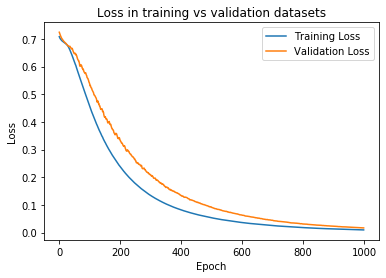

In [19]:
#Diagnostic plot Ia: Model Performance (training loss vs test loss) for 1000 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

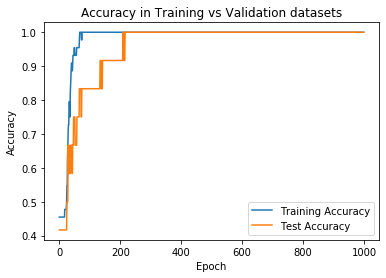

In [20]:
#Diagnostic Plot IIa: Model Performance (training accuracy vs test accuracy) for 1000 epochs
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()